In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df= pd.read_csv(r'C:\Users\User\Desktop\surcey mental health\COVID-19 Survey Student Responses.csv.csv')
print (df.shape)
df.head()

(1182, 19)


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [3]:
df['Time spent on TV'].replace('No tv', 0, inplace=True)
df['Time spent on TV'].replace('n', 0, inplace=True)
df['Time spent on TV'].replace('N', 0, inplace=True)
df['Time spent on TV'].replace(' ', 0, inplace=True)
df['Time spent on TV'] = df['Time spent on TV'].astype('float')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('None ', 'None')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp')
df.rename(columns = {"Health issue during lockdown":"Mental Health issue during lockdown"}, inplace = True)

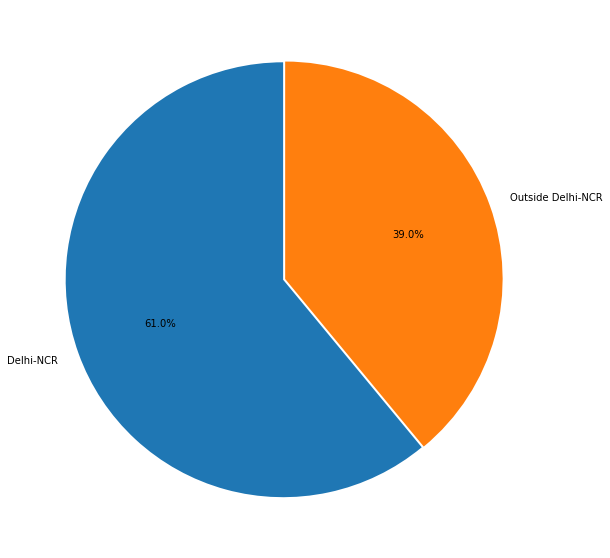

In [4]:
dict_ = df['Region of residence'].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', 
        startangle=90, explode = [0.01, 0])
plt.show()

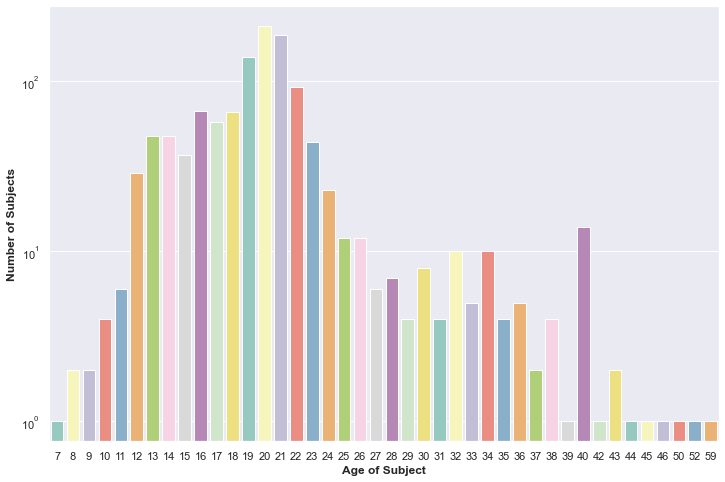

In [5]:
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.countplot(x='Age of Subject', data=df, palette='Set3')
plt.yscale('log')
plt.xlabel('Age of Subject', weight='bold')
plt.ylabel('Number of Subjects', weight='bold')
plt.show()

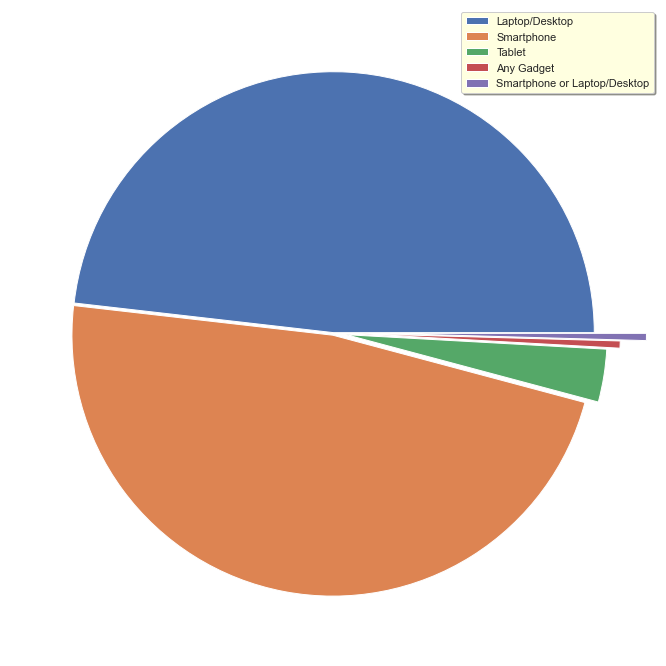

In [6]:
dict_ = df['Medium for online class'].value_counts().to_dict()
plt.figure(figsize=(12,12))
plt.pie(x=dict_.values(),
        startangle=0, explode=[0, 0.01, 0.05, 0.1, 0.2])
plt.legend(labels=dict_.keys(), loc='upper right',shadow=True, facecolor='lightyellow')
plt.show()

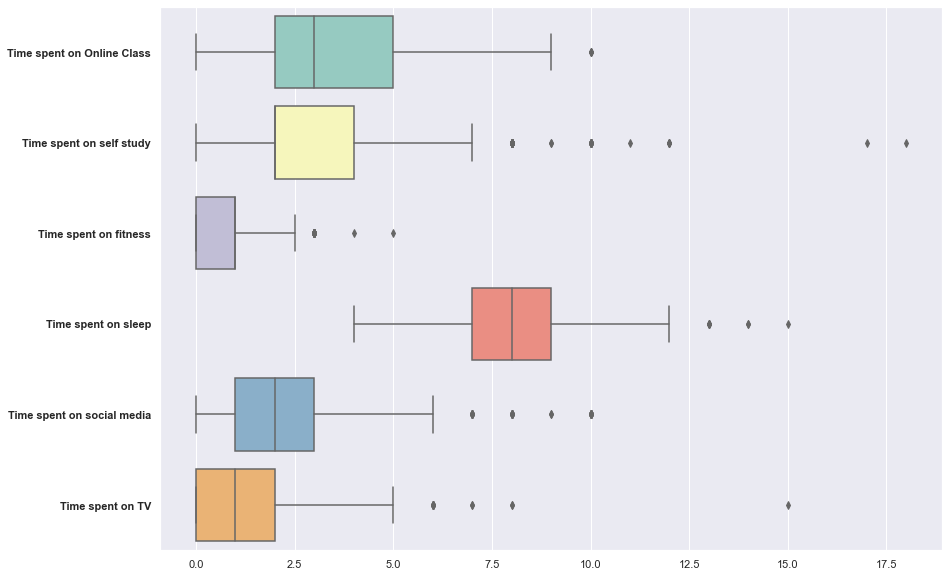

In [7]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
sns.boxplot(data=df[['Time spent on Online Class','Time spent on self study','Time spent on fitness',
                    'Time spent on sleep','Time spent on social media', 'Time spent on TV']],
             orient='h', palette='Set3')
plt.yticks(weight='bold')
plt.show()

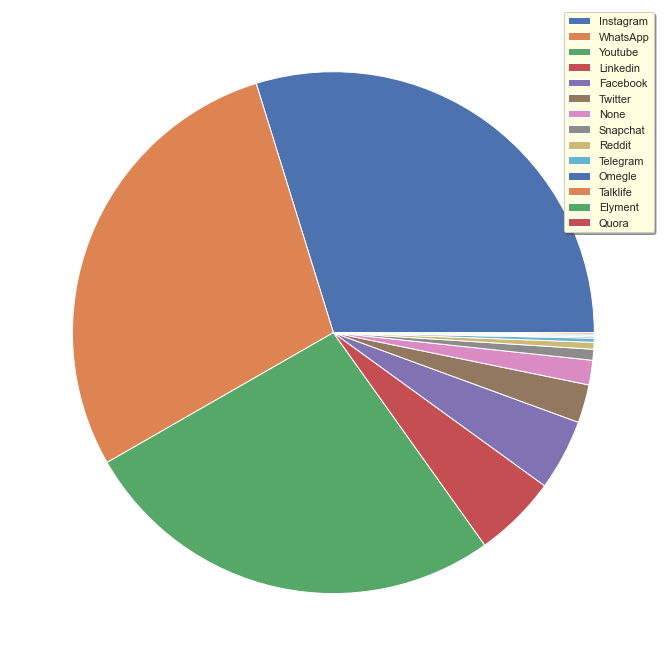

In [8]:
dict_ = df['Prefered social media platform'].value_counts().to_dict()
plt.figure(figsize=(12,12))
plt.pie(x=dict_.values(), startangle=0)
plt.legend(labels=dict_.keys(), loc='upper right',shadow=True, facecolor='lightyellow')
plt.show()

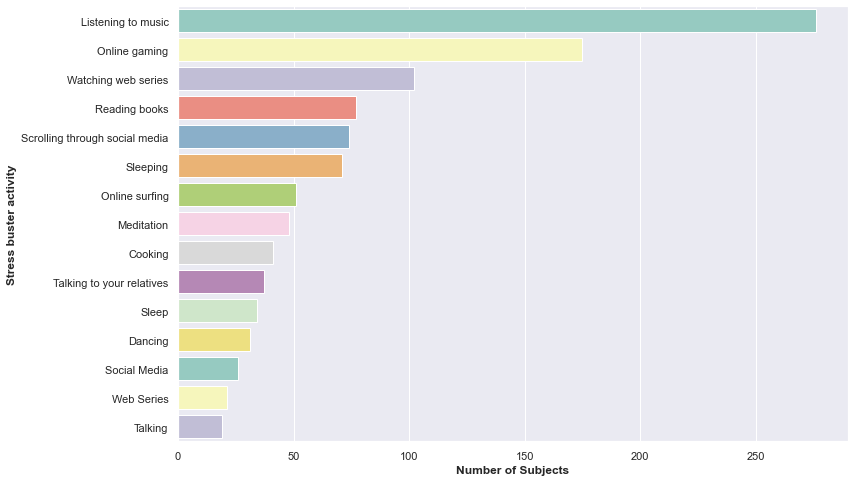

In [9]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='Stress busters', data=df, order=df['Stress busters'].value_counts().index[:15], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("Stress buster activity", weight='bold')
plt.show()

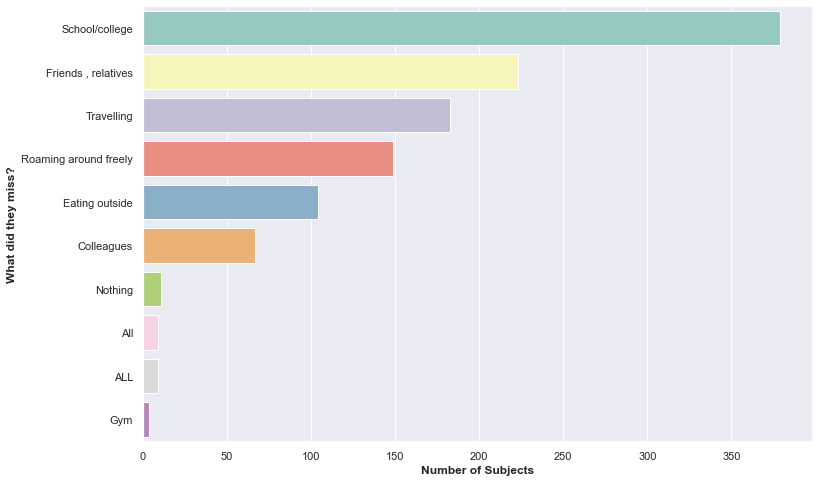

In [10]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='What you miss the most', data=df, order=df['What you miss the most'].value_counts().index[:10], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("What did they miss?", weight='bold')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Mental Health issue during lockdown'>

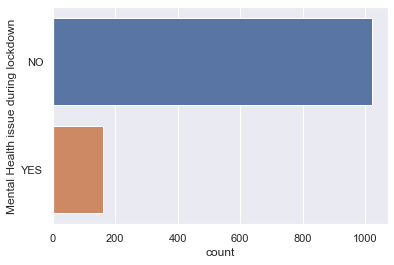

In [11]:
sns.countplot(y="Mental Health issue during lockdown",data=df)

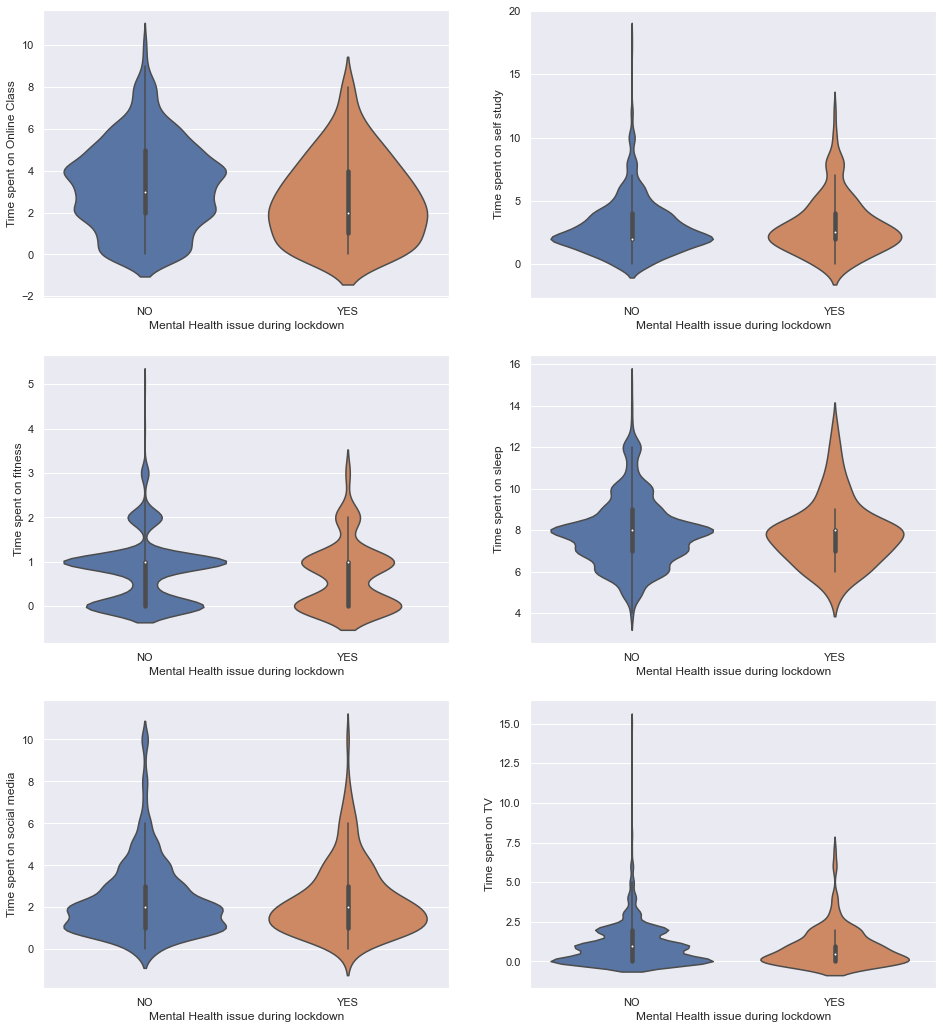

In [12]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(16,18))
sns.violinplot(x='Mental Health issue during lockdown', y='Time spent on Online Class', data=df, ax=ax[0,0])
sns.violinplot(x='Mental Health issue during lockdown', y='Time spent on self study', data=df, ax=ax[0,1])
sns.violinplot(x='Mental Health issue during lockdown', y='Time spent on fitness', data=df, ax=ax[1,0])
sns.violinplot(x='Mental Health issue during lockdown', y='Time spent on sleep', data=df, ax=ax[1,1])
sns.violinplot(x='Mental Health issue during lockdown', y='Time spent on social media', data=df, ax=ax[2,0])
sns.violinplot(x='Mental Health issue during lockdown', y='Time spent on TV', data=df, ax=ax[2,1])
plt.show()

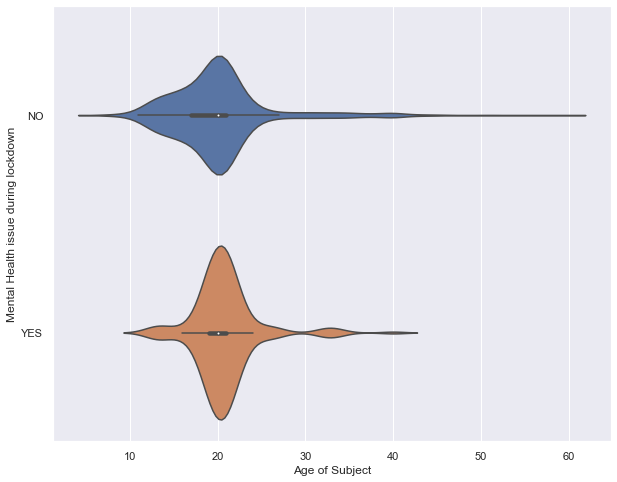

In [13]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.violinplot(y='Mental Health issue during lockdown', x='Age of Subject', data=df)
plt.show()

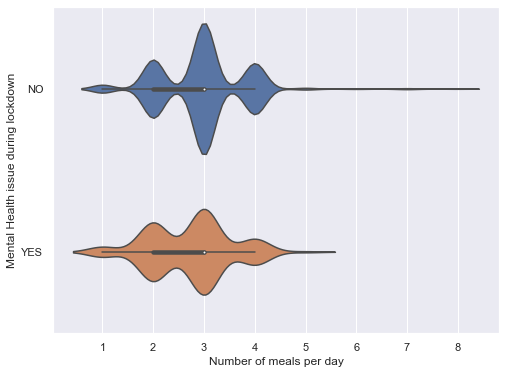

In [14]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.violinplot(y='Mental Health issue during lockdown', x='Number of meals per day', data=df)
plt.show()

### Classification and Model

In [15]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Mental Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [16]:
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Mental Health issue during lockdown', 'Stress busters',
       'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [17]:
df.isnull().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [18]:
df=df.dropna()

In [19]:
df.isnull().sum()

ID                                                                                    0
Region of residence                                                                   0
Age of Subject                                                                        0
Time spent on Online Class                                                            0
Rating of Online Class experience                                                     0
Medium for online class                                                               0
Time spent on self study                                                              0
Time spent on fitness                                                                 0
Time spent on sleep                                                                   0
Time spent on social media                                                            0
Prefered social media platform                                                        0
Time spent on TV                

In [20]:
print(df['Region of residence'].unique())
print(df['Rating of Online Class experience'].unique())
print(df['Medium for online class'].unique())
print(df['Prefered social media platform'].unique())
print(df['Change in your weight'].unique())
print(df['Mental Health issue during lockdown'].unique())
print(df['Time utilized'].unique())
print(df['Do you find yourself more connected with your family, close friends , relatives  ?'].unique())

['Delhi-NCR' 'Outside Delhi-NCR']
['Good' 'Excellent' 'Very poor' 'Average' 'Poor']
['Laptop/Desktop' 'Smartphone' 'Tablet' 'Any Gadget'
 'Smartphone or Laptop/Desktop']
['Linkedin' 'Youtube' 'Instagram' 'WhatsApp' 'None' 'Reddit' 'Snapchat'
 'Twitter' 'Telegram' 'Facebook' 'Elyment' 'Quora' 'Talklife']
['Increased' 'Decreased' 'Remain Constant']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']


### Taking the data used to build the model

In [21]:
model_data=df[['Region of residence','Age of Subject','Time spent on Online Class','Rating of Online Class experience','Medium for online class','Time spent on self study','Time spent on fitness','Time spent on social media','Prefered social media platform','Time spent on TV','Number of meals per day','Change in your weight','Time utilized','Do you find yourself more connected with your family, close friends , relatives  ?','Mental Health issue during lockdown']]

In [22]:
model_data.head()

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",Mental Health issue during lockdown
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,3.0,Linkedin,1.0,4,Increased,YES,YES,NO
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,3.0,Youtube,0.0,3,Decreased,YES,NO,NO
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,2.0,Linkedin,0.0,3,Remain Constant,NO,YES,NO
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,5.0,Instagram,0.0,3,Decreased,NO,NO,NO
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,3.0,Instagram,1.0,4,Remain Constant,NO,NO,NO


##### Encoding Categorical Data

In [23]:

data_encoded=pd.get_dummies(data=model_data,drop_first=True)
data_encoded.head()


,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on social media,Time spent on TV,Number of meals per day,Region of residence_Outside Delhi-NCR,Rating of Online Class experience_Excellent,Rating of Online Class experience_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Change in your weight_Increased,Change in your weight_Remain Constant,Time utilized_YES,"Do you find yourself more connected with your family, close friends , relatives ?_YES",Mental Health issue during lockdown_YES
0,21,2.0,4.0,0.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,21,0.0,0.0,2.0,3.0,0.0,3,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,20,7.0,3.0,0.0,2.0,0.0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,20,3.0,2.0,1.0,5.0,0.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,3.0,3.0,1.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [24]:
data_encoded

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on social media,Time spent on TV,Number of meals per day,Region of residence_Outside Delhi-NCR,Rating of Online Class experience_Excellent,Rating of Online Class experience_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Change in your weight_Increased,Change in your weight_Remain Constant,Time utilized_YES,"Do you find yourself more connected with your family, close friends , relatives ?_YES",Mental Health issue during lockdown_YES
0,21,2.0,4.0,0.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,21,0.0,0.0,2.0,3.0,0.0,3,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,20,7.0,3.0,0.0,2.0,0.0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,20,3.0,2.0,1.0,5.0,0.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,3.0,3.0,1.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,12,3.0,4.0,1.0,1.0,2.0,3,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1178,14,6.0,4.0,1.0,1.0,1.0,4,0,0,0,...,0,0,0,1,0,0,1,1,1,0
1179,13,4.0,0.0,0.5,3.0,2.0,4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1180,14,5.0,3.5,1.0,0.5,1.0,4,0,1,0,...,0,0,0,0,1,0,1,1,1,0


In [25]:
data_encoded.columns

Index(['Age of Subject', 'Time spent on Online Class',
       'Time spent on self study', 'Time spent on fitness',
       'Time spent on social media', 'Time spent on TV',
       'Number of meals per day', 'Region of residence_Outside Delhi-NCR',
       'Rating of Online Class experience_Excellent',
       'Rating of Online Class experience_Good',
       'Rating of Online Class experience_Poor',
       'Rating of Online Class experience_Very poor',
       'Medium for online class_Laptop/Desktop',
       'Medium for online class_Smartphone',
       'Medium for online class_Smartphone or Laptop/Desktop',
       'Medium for online class_Tablet',
       'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       

In [26]:
from sklearn.utils import shuffle

#### Splitting the Data into independent and dependent variables

In [27]:

X=data_encoded[['Age of Subject', 'Time spent on Online Class',
       'Time spent on self study', 'Time spent on fitness',
       'Time spent on social media', 'Time spent on TV',
       'Region of residence_Outside Delhi-NCR',
       'Rating of Online Class experience_Excellent',
       'Change in your weight_Remain Constant',
       'Rating of Online Class experience_Good',
       'Rating of Online Class experience_Poor',
       'Rating of Online Class experience_Very poor',
       'Medium for online class_Laptop/Desktop',
       'Medium for online class_Smartphone',
       'Medium for online class_Smartphone or Laptop/Desktop',
       'Medium for online class_Tablet',
       'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Time utilized_YES']]
y=data_encoded['Change in your weight_Increased']
#X, y = shuffle(X, y)
print(X.head())
print(y.head())

   Age of Subject  Time spent on Online Class  Time spent on self study  \
0              21                         2.0                       4.0   
1              21                         0.0                       0.0   
2              20                         7.0                       3.0   
3              20                         3.0                       2.0   
4              21                         3.0                       3.0   

   Time spent on fitness  Time spent on social media  Time spent on TV  \
0                    0.0                         3.0               1.0   
1                    2.0                         3.0               0.0   
2                    0.0                         2.0               0.0   
3                    1.0                         5.0               0.0   
4                    1.0                         3.0               1.0   

   Region of residence_Outside Delhi-NCR  \
0                                      0   
1               

#### Applying Standard Scaler to independent variables

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]

array([[ 1.59103135e-01, -6.24855842e-01,  5.07113628e-01,
        -1.05552053e+00,  3.68089063e-01, -1.75142051e-03,
        -8.02430900e-01, -3.04554795e-01, -9.03000172e-01,
         2.01785750e+00, -1.65069550e-01, -7.46894397e-01,
         1.03693267e+00, -9.54187074e-01, -6.66370568e-02,
        -1.83904434e-01, -2.15066197e-01, -6.48732820e-01,
         4.34074939e+00, -1.23532681e-01, -2.97482059e-02,
        -6.66370568e-02, -8.44024621e-02, -2.97482059e-02,
        -5.15710623e-02, -1.50346195e-01, -6.30890046e-01,
        -6.09023063e-01,  1.02961609e+00],
       [ 1.59103135e-01, -1.58699050e+00, -1.37028576e+00,
         1.71526680e+00,  3.68089063e-01, -7.94094059e-01,
        -8.02430900e-01,  3.28348138e+00, -9.03000172e-01,
        -4.95575134e-01, -1.65069550e-01, -7.46894397e-01,
        -9.64382771e-01,  1.04801252e+00, -6.66370568e-02,
        -1.83904434e-01, -2.15066197e-01, -6.48732820e-01,
        -2.30374968e-01, -1.23532681e-01, -2.97482059e-02,
        -6.66

#### Splitting data into train and test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Applying Naïve Bayes and Evaluatiing it

In [31]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB(var_smoothing=1)


# fit the model
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=1)

In [32]:
y_predict = gnb.predict(X_test)

y_predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predict)))

Model accuracy score: 0.7529


In [34]:
print(confusion_matrix(y_test, gnb.predict(X_test)))
print(classification_report(y_test, gnb.predict(X_test)))

[[167  44]
 [ 40  89]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       211
           1       0.67      0.69      0.68       129

    accuracy                           0.75       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.75      0.75      0.75       340



In [35]:
cross_val_score(gnb,X_train,y_train,cv=5).mean()

0.7230714115118223

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)


print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-score : {0:0.4f}'.format(F1))

Confusion matrix

 [[167  44]
 [ 40  89]]

True Positives(TP) =  167

True Negatives(TN) =  89

False Positives(FP) =  44

False Negatives(FN) =  40
Classification accuracy : 0.7529
Precision : 0.7915
Recall or Sensitivity : 0.8068
Specificity : 0.6692
F1-score : 0.7990


#### Building ANN and Evaluating it

In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
classifier = Sequential()
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [39]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 150,verbose = 1)

Epoch 1/150
80/80 [==============================] - 28s 2ms/step - loss: 0.6912 - accuracy: 0.6218
Epoch 2/150
80/80 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6512
Epoch 3/150
80/80 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.6954
Epoch 4/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8444
Epoch 5/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8468
Epoch 6/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8390
Epoch 7/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8576
Epoch 8/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8594
Epoch 9/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8441
Epoch 10/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8576
Epoch 11

In [41]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[167  44]
 [ 33  96]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       211
           1       0.69      0.74      0.71       129

    accuracy                           0.77       340
   macro avg       0.76      0.77      0.76       340
weighted avg       0.78      0.77      0.78       340



SVM

In [43]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [44]:
clf = SVC(C=20.0, gamma=0.00001)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
acc

0.6205882352941177

In [45]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [46]:
y_predict = clf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_predict)
print(result)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       211
           1       0.00      0.00      0.00       129

    accuracy                           0.62       340
   macro avg       0.31      0.50      0.38       340
weighted avg       0.39      0.62      0.48       340



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
 cross_val_score(clf,X_train,y_train,cv=5).mean()

0.629583631876443

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)


print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-score : {0:0.4f}'.format(F1))

Confusion matrix

 [[211   0]
 [129   0]]

True Positives(TP) =  211

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  129
Classification accuracy : 0.6206
Precision : 1.0000
Recall or Sensitivity : 0.6206
Specificity : nan
F1-score : 0.7659


<ipython-input-49-be3eab6275cf>:24: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = TN / (TN + FP)


Decision Tree & Logistic Regression

In [50]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train, y_train)

y_predict_tree = tree.predict(X_test)

# Predict the labels for the test data
pred_labels_tree = tree.predict(X_test)

In [51]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
pred_labels_logit = logreg.predict(X_test)



y_predict_logistic = logreg.predict(X_test)

In [52]:
# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, y_predict_tree)
class_rep_log = classification_report(y_test, y_predict_logistic)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       201
           1       0.72      0.65      0.69       139

    accuracy                           0.76       340
   macro avg       0.75      0.74      0.74       340
weighted avg       0.75      0.76      0.75       340

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.93      0.75      0.83       201
           1       0.72      0.91      0.80       139

    accuracy                           0.82       340
   macro avg       0.82      0.83      0.82       340
weighted avg       0.84      0.82      0.82       340



In [53]:
from sklearn.model_selection import KFold, cross_val_score
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Set up our K-fold cross-validation
kf = KFold(n_splits=5,random_state=3, shuffle=True)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree,X,y,cv=kf)
logit_score = cross_val_score(logreg,X,y,cv=kf)

In [54]:
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7524423999064365 Logistic Regression: 0.8125453198705703


In [55]:
#decision tree
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_tree)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)


print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-score : {0:0.4f}'.format(F1))

Confusion matrix

 [[166  35]
 [ 48  91]]

True Positives(TP) =  166

True Negatives(TN) =  91

False Positives(FP) =  35

False Negatives(FN) =  48
Classification accuracy : 0.7559
Precision : 0.8259
Recall or Sensitivity : 0.7757
Specificity : 0.7222
F1-score : 0.8000


In [56]:
#Logistic regression

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_logistic)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-score : {0:0.4f}'.format(F1))

Confusion matrix

 [[151  50]
 [ 12 127]]

True Positives(TP) =  151

True Negatives(TN) =  127

False Positives(FP) =  50

False Negatives(FN) =  12
Classification accuracy : 0.8176
Precision : 0.7512
Recall or Sensitivity : 0.9264
Specificity : 0.7175
F1-score : 0.8297


Random Forest

In [57]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7971


In [58]:
cross_val_score(rfc,X_train,y_train,cv=5).mean()

0.7838070217339383

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       201
           1       0.00      0.00      0.00       139

    accuracy                           0.59       340
   macro avg       0.30      0.50      0.37       340
weighted avg       0.35      0.59      0.44       340



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)


print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-score : {0:0.4f}'.format(F1))

Confusion matrix

 [[201   0]
 [139   0]]

True Positives(TP) =  201

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  139
Classification accuracy : 0.5912
Precision : 1.0000
Recall or Sensitivity : 0.5912
Specificity : nan
F1-score : 0.7431


<ipython-input-60-be3eab6275cf>:24: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = TN / (TN + FP)


In [91]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       201
           1       0.69      0.65      0.67       139

    accuracy                           0.74       340
   macro avg       0.73      0.72      0.73       340
weighted avg       0.74      0.74      0.74       340



In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1-score : {0:0.4f}'.format(F1))

Confusion matrix

 [[161  40]
 [ 49  90]]

True Positives(TP) =  161

True Negatives(TN) =  90

False Positives(FP) =  40

False Negatives(FN) =  49
Classification accuracy : 0.7382
Precision : 0.8010
Recall or Sensitivity : 0.7667
Specificity : 0.6923
F1-score : 0.7835


In [95]:
cross_val_score(knn,X_train,y_train,cv=5).mean()

0.7370193455935037